# Инжиниринг численных признаков
## Цель работы
Ознакомиться с основными приемами работы с численными атрибутами в датасетах для машинного обучения.

## Содержание работы
1. Загрузить прилагающийся к работе датасет PRSA_Data
2. Выведите на экран основную информацию о датасете. Идентифицируйте значения вне разумного диапазона
3. Постройте визуализацию распределения каждого численного атрибута.
4. Исходя из распределения атрибутов по необходимости примените бинаризацию численных признаков.
5. Постройте совместное распределение каждого признака вместе с целевой переменной. Сделайте вывод о необходимости проведения группировки данных.
6. Удалите или ограничьте экстремальные значения атрибутов.
7. Избавьтесь от пропущенных значений в датасете.
8. При необходимости округлите излишне точные значения атрибутов.
9. Рассмотрите возможность преобразования шкалы атрибута к логарифмической.

## Первоначальное знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prsa_data = pd.read_csv("data/PRSA_Data.csv", index_col=0)
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [3]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 0 to 35063
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         35064 non-null  int64  
 1   SO2        35064 non-null  float64
 2   NO2        35064 non-null  float64
 3   CO         35064 non-null  float64
 4   O3         35064 non-null  float64
 5   PRES       35064 non-null  float64
 6   RAIN       35064 non-null  float64
 7   wd         35064 non-null  object 
 8   WSPM       35064 non-null  float64
 9   AQI Label  35064 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 2.9+ MB


In [4]:
prsa_data.describe()

,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


## Идентификация ошибочных значений

In [5]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


## Визуализация распределения атрибутов

<Axes: xlabel='SO2', ylabel='Count'>

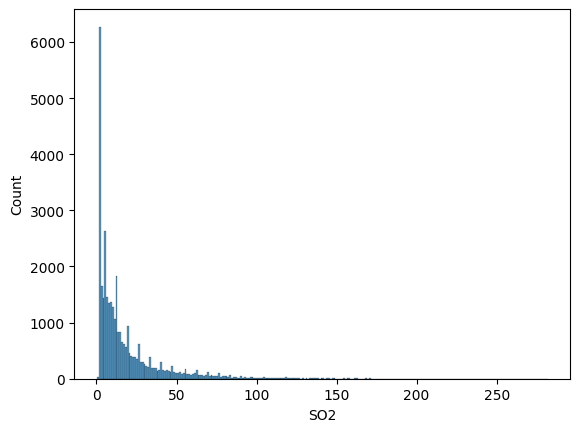

In [6]:
sns.histplot(prsa_data.SO2)

<Axes: xlabel='NO2', ylabel='Density'>

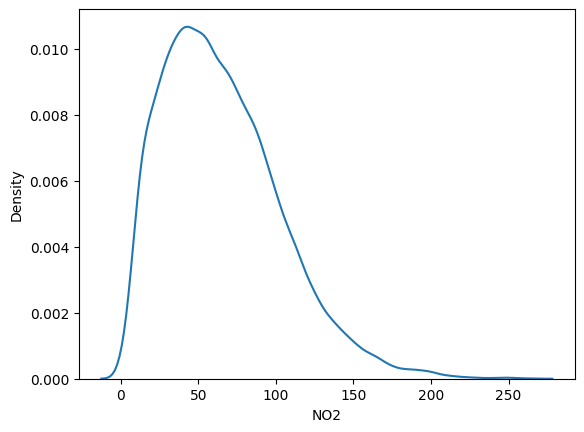

In [7]:
sns.kdeplot(prsa_data.NO2)

<Axes: xlabel='CO', ylabel='Count'>

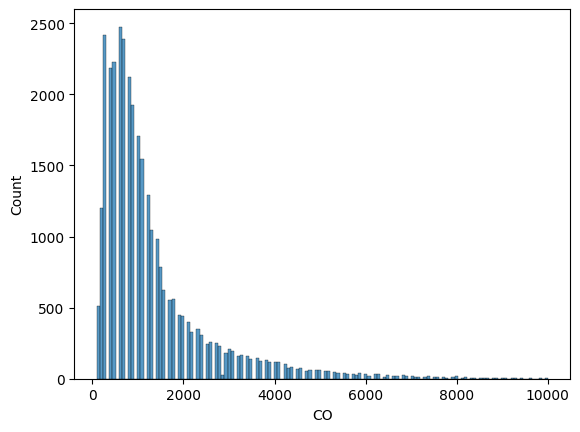

In [8]:
sns.histplot(prsa_data.CO)

<Axes: xlabel='O3', ylabel='Count'>

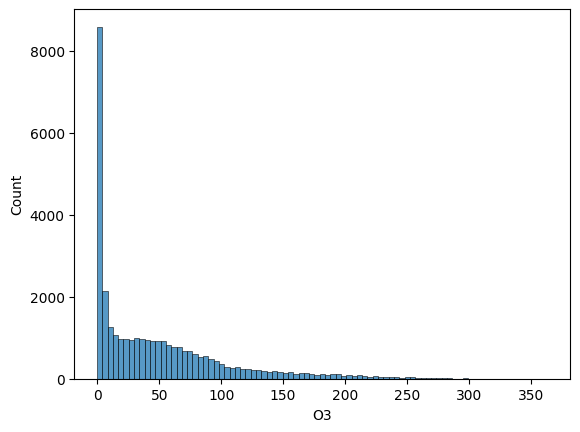

In [9]:
sns.histplot(prsa_data.O3)

<Axes: xlabel='PRES', ylabel='Count'>

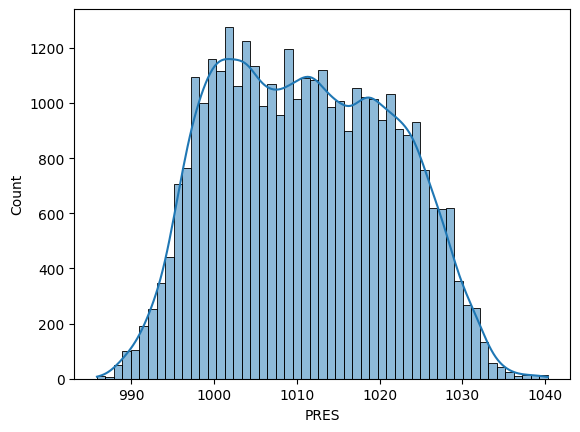

In [10]:
sns.histplot(prsa_data.PRES, kde=True)

<Axes: xlabel='RAIN', ylabel='Count'>

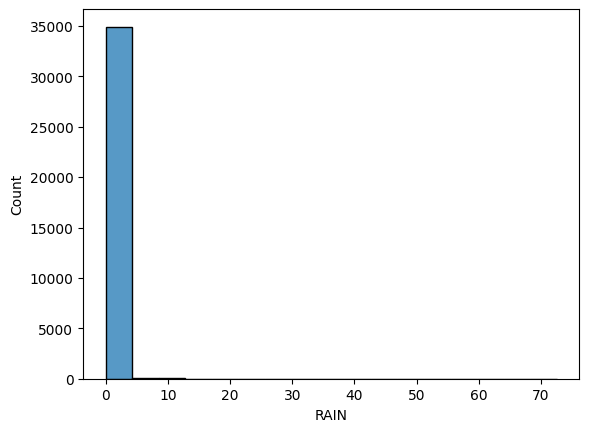

In [11]:
sns.histplot(prsa_data.RAIN)

<Axes: xlabel='WSPM', ylabel='Count'>

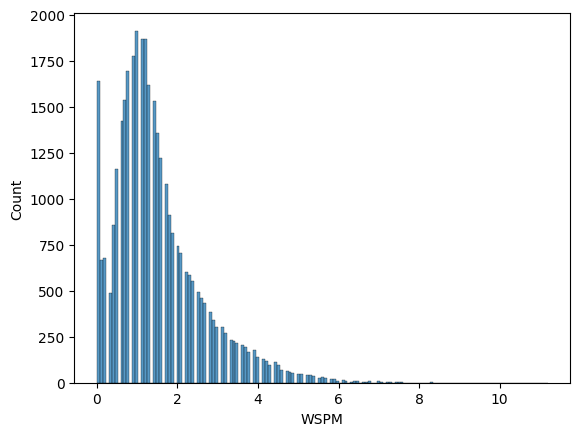

In [12]:
sns.histplot(prsa_data.WSPM)

## Бинаризация атрибутов

Такие распределения, как в атрибуте "количество осадков" могут повредить эффективности модели, так как относительное численной значение при таком распределении не несет, по сути, статистической значимости по сравнению с информацией о том, были ли вообще осадки или нет. То есть этот атрибут из численного можно превратить в категориальный. Ведь в нашем датасете всего 1436 точек из 35 000 имеют ненулевое значение:

In [13]:
prsa_data.RAIN[prsa_data.RAIN > 0]

267      0.1
268      0.4
269      0.1
270      0.9
271      0.9
        ... 
34891    0.2
34892    0.7
34893    0.9
34894    0.4
34895    0.2
Name: RAIN, Length: 1436, dtype: float64

In [14]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35044.000000
mean,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040977
std,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198240
min,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


## Визуализация связи атрибутов с целевой переменной

<Axes: xlabel='SO2', ylabel='Density'>

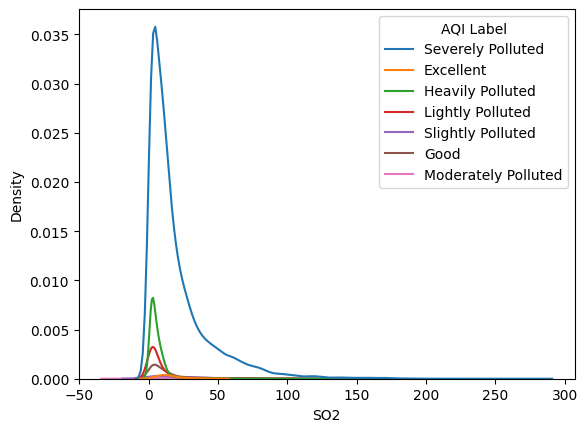

In [15]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

<Axes: xlabel='NO2', ylabel='Density'>

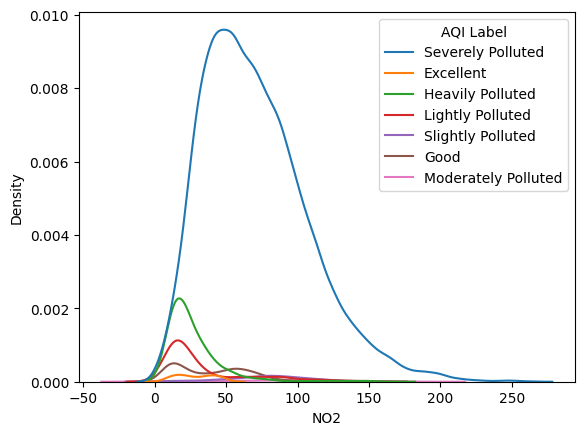

In [16]:
sns.kdeplot(data=prsa_data, x="NO2", hue="AQI Label")

C:\Users\Polyak\AppData\Local\Temp\ipykernel_13712\491964310.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")


<Axes: xlabel='CO', ylabel='Density'>

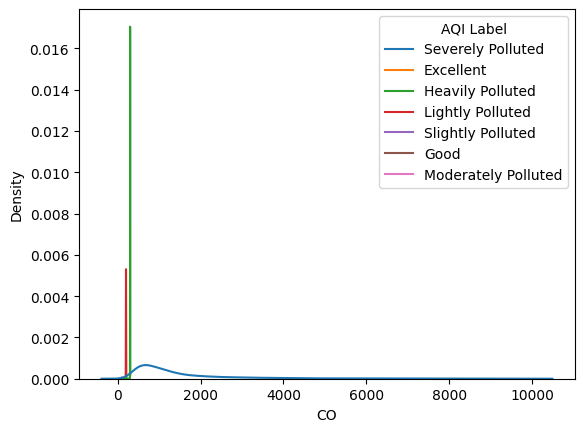

In [17]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")

Тут можем заметить различия, найдем их

C:\Users\Polyak\AppData\Local\Temp\ipykernel_13712\2756761127.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

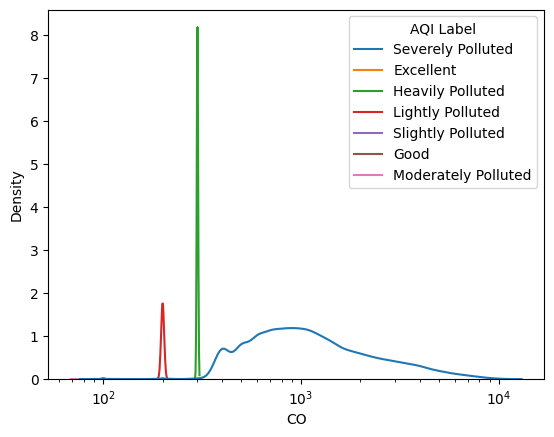

In [18]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

На некоторых участках диапазона значений данного атрибута преобладает значение "Lightly polluted", на других - "Heavily polluted". Это значит, что данный атрибут очень важен для предсказания значения целевой переменной. В дальнейшем мы используем эту информацию для категоризации этого атрибута.

<Axes: xlabel='O3', ylabel='Density'>

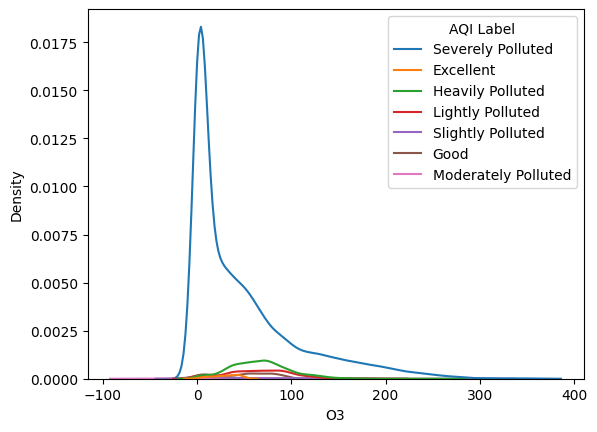

In [19]:
sns.kdeplot(data=prsa_data, x="O3", hue="AQI Label")

<Axes: xlabel='PRES', ylabel='Density'>

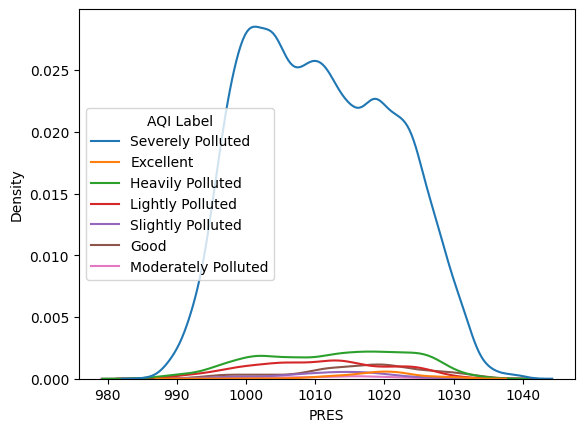

In [20]:
sns.kdeplot(data=prsa_data, x="PRES", hue="AQI Label")

<Axes: xlabel='WSPM', ylabel='Density'>

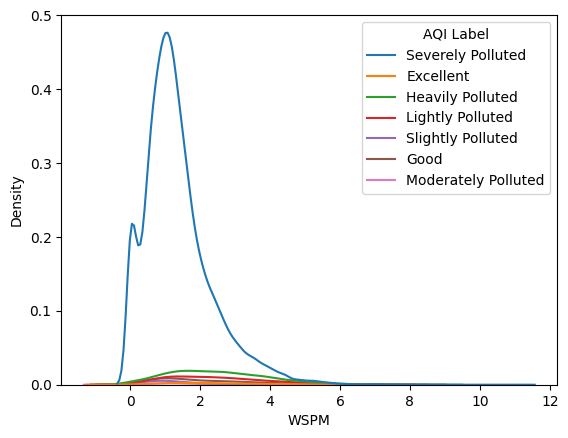

In [21]:
sns.kdeplot(data=prsa_data, x="WSPM", hue="AQI Label")

В целом, анализ влияния атрибутов показывает, что их влияние скорее проявляется в совокупности. Нет одного четко дифференцирующего фактора, особенно указывающего на все возможные значения целевой переменной.

## Группировка численных значений

В некоторых случаях бывает полезно объединить численные значения атрибутов на метку диапазона значений. То есть мы объединяем (группируем) объекты по значению данного атрибута и затем заменяем сам численный атрибут на ту группу, в которую попал объект. Этот прием называется дискретизация или группировка численных значений. Например, возьмем атрибут "CO". На предыдущем шаге мы уже выяснили, что объекты, находящиеся в различных диапазонах его значений будут иметь разное распределение целевой переменной. Условные границы этих диапазонов можно изобразить на графике:

C:\Users\Polyak\AppData\Local\Temp\ipykernel_13712\2756761127.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

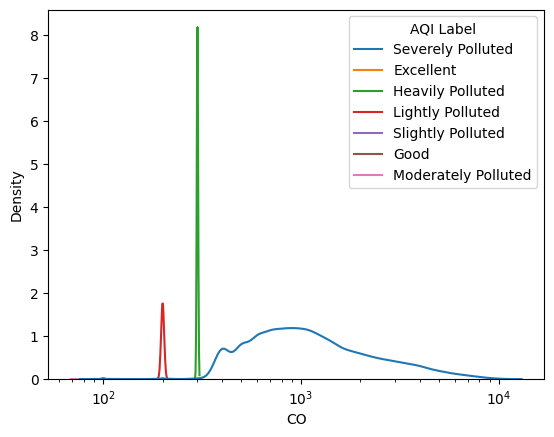

In [22]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

In [23]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']), 
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,NaN
4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


In [24]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,0
4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


## Удаление экстремальных значений

In [25]:
prsa_data.PRES[prsa_data.PRES <= 992] = 992
prsa_data.PRES[prsa_data.PRES >= 1034] = 1034

C:\Users\Polyak\AppData\Local\Temp\ipykernel_13712\3964902396.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prsa_data.PRES[prsa_data.PRES <= 992] = 992
C:\Users\Polyak\AppData\Local\Temp\ipykernel_13712\3964902396.py:1: SettingWithCopy

<Axes: xlabel='PRES', ylabel='Count'>

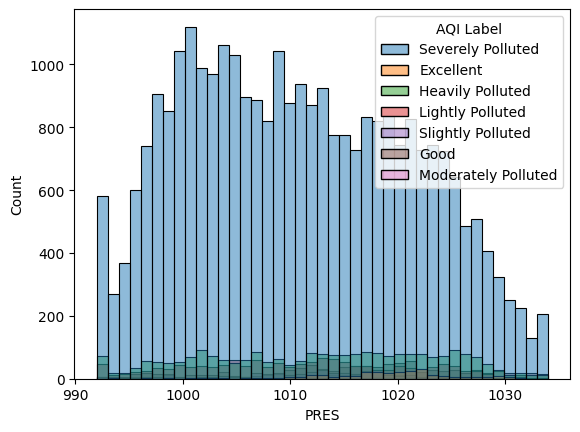

In [26]:
sns.histplot(data=prsa_data, x="PRES", hue="AQI Label")

## Заполнение пропусков

<Axes: >

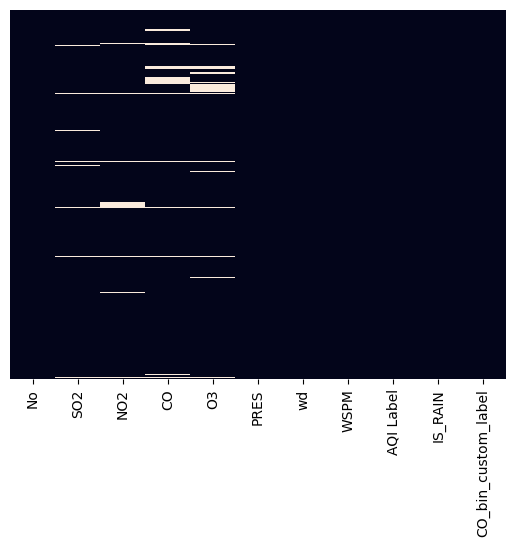

In [27]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [28]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

3        2
276      3
435      2
459      2
555      2
        ..
34880    4
34883    4
34885    4
35029    2
35030    2
Length: 884, dtype: int64

In [29]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

<Axes: >

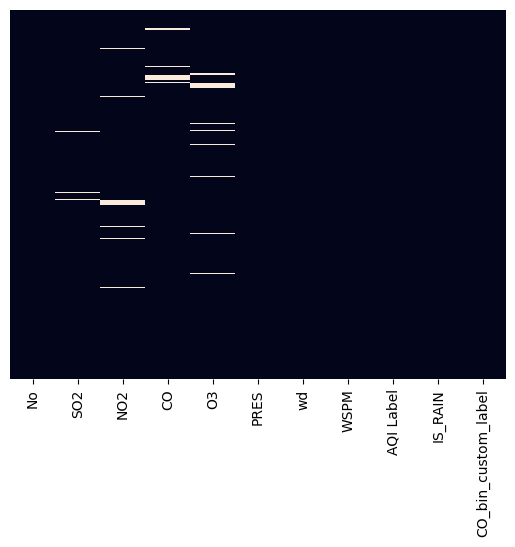

In [30]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [31]:
prsa_data.isnull().sum()

No                        0
SO2                     281
NO2                     702
CO                     1028
O3                     1300
PRES                      0
wd                        0
WSPM                      0
AQI Label                 0
IS_RAIN                   0
CO_bin_custom_label       0
dtype: int64

In [32]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())

In [33]:
filler = prsa_data.O3[prsa_data.O3.isna()]

In [34]:
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)

In [35]:
prsa_data.O3 = prsa_data.O3.fillna(filler)

## Округление атрибутов

In [36]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,1,6.000000,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,2,6.000000,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,3,1011.055986,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,5,9.000000,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,6,8.000000,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2


## Логарифмирование атрибутов

In [37]:
prsa_data.SO2 = np.log(prsa_data.SO2)

<Axes: xlabel='SO2', ylabel='Count'>

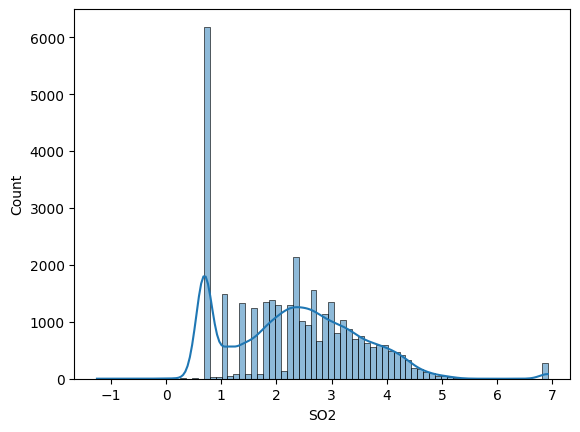

In [38]:
sns.histplot(prsa_data.SO2, kde=True)

При таком равномерном распределении информации модели будет легче работать с этим признаком.

## Задания для самостоятельного выполнения

### 1. При выполнении 3 и 5 заданий используйте другие методы визуализации. Найдите самый подходящий тип графика для каждого распределения.

In [39]:
numeric_columns = prsa_data.select_dtypes(include=['float64', 'int64']).columns

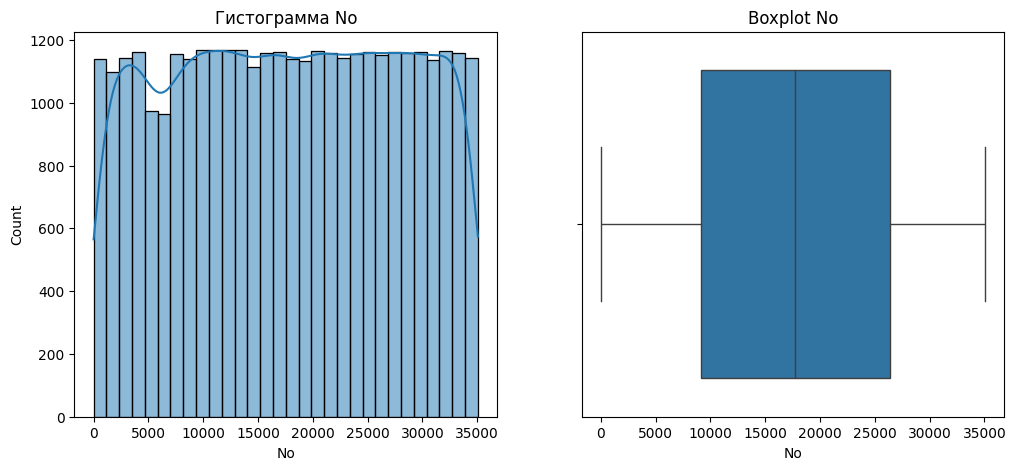

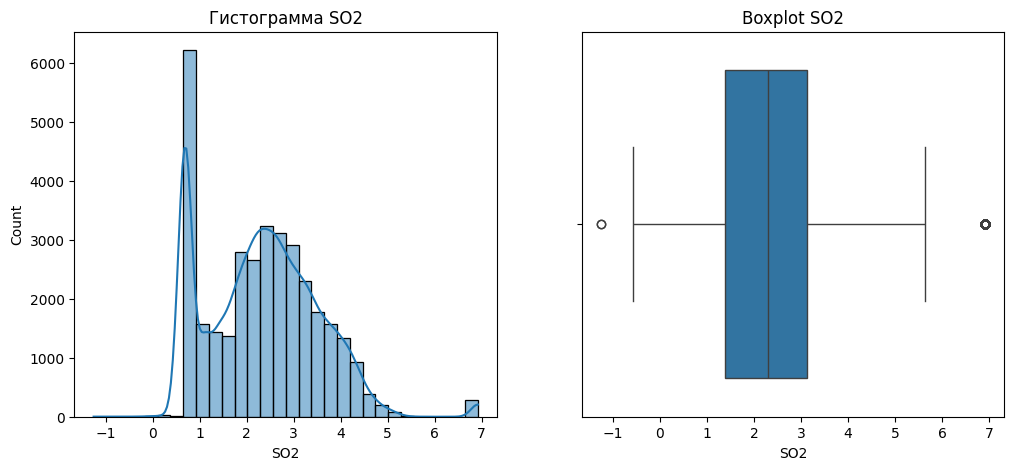

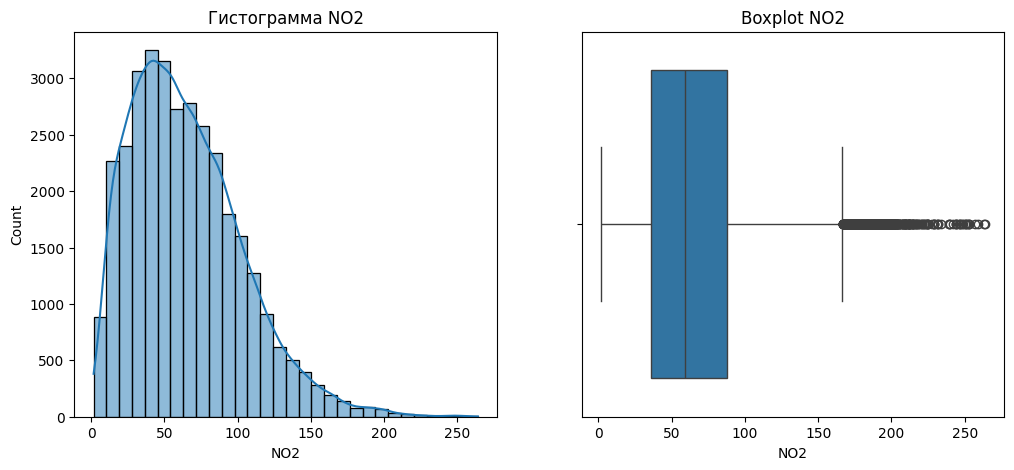

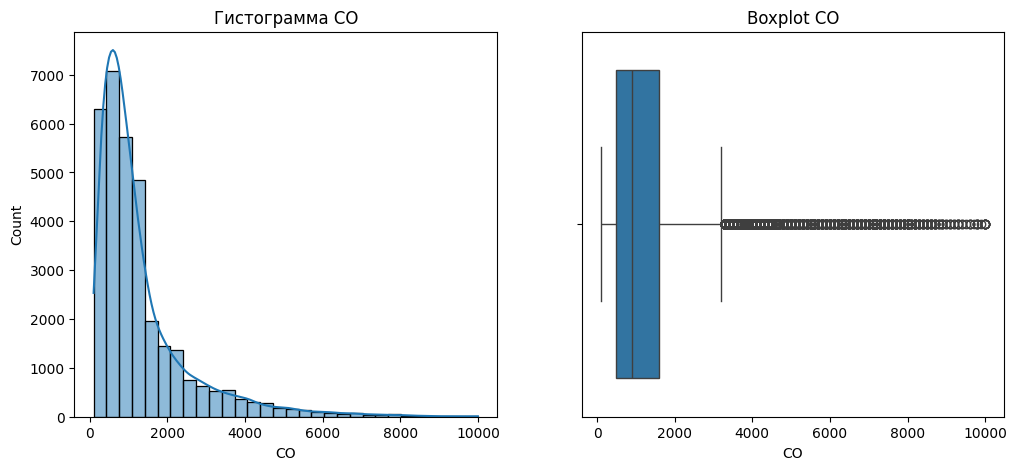

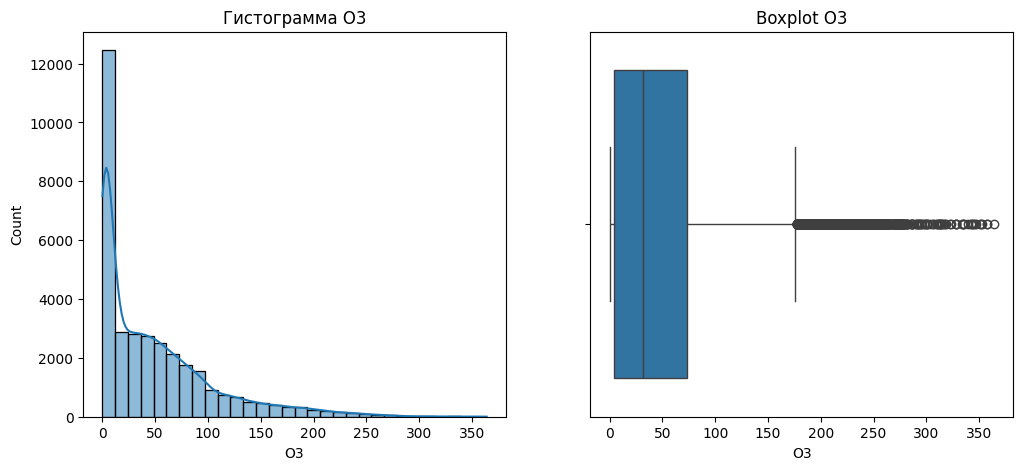

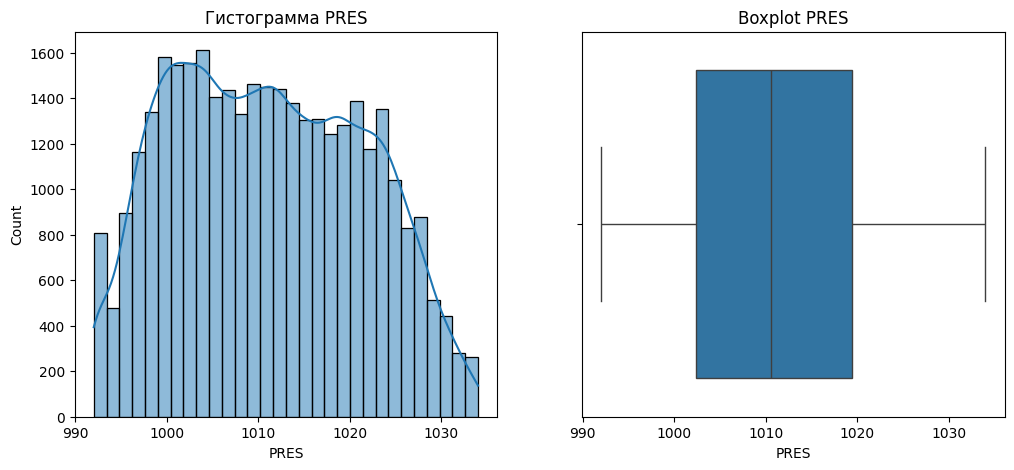

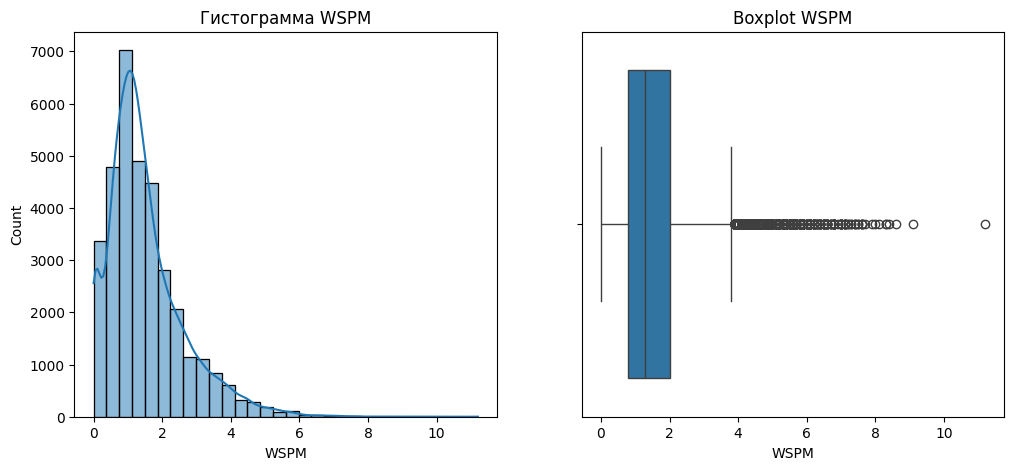

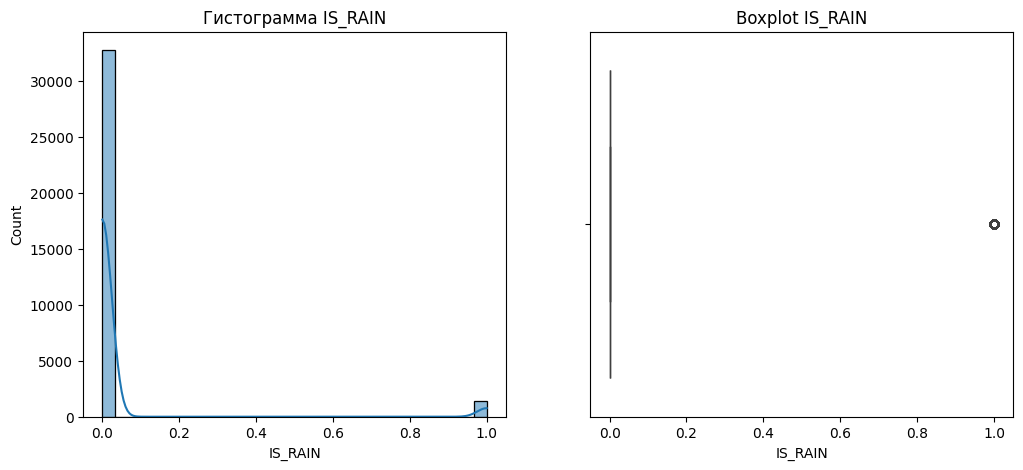

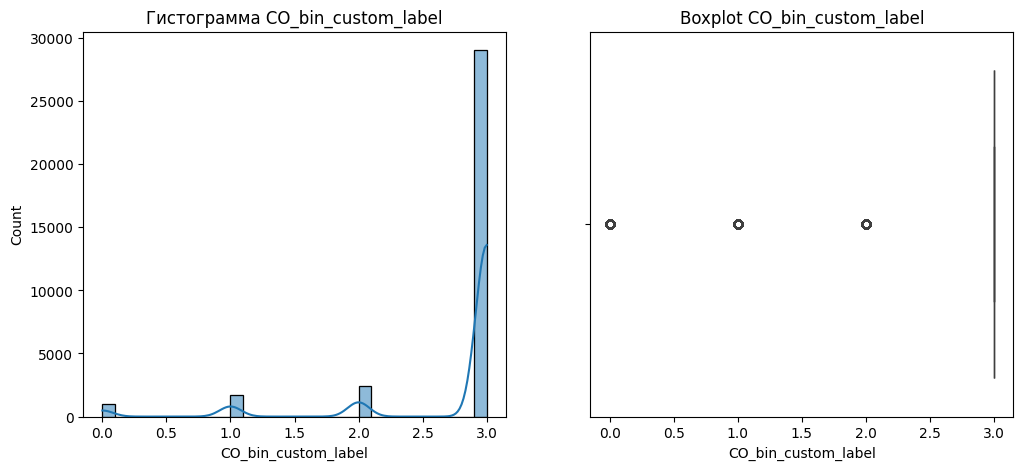

In [40]:
for col in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(prsa_data[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f'Гистограмма {col}')
    
    sns.boxplot(x=prsa_data[col], ax=axes[1])
    axes[1].set_title(f'Boxplot {col}')
    
    plt.show()

### 2. При выполнении 6 задания мы явно подбирали руками границы диапазона для клиппинга. Реализуйте адаптивный клиппинг через процентили.

In [41]:
for col in numeric_columns:
    lower_bound = prsa_data[col].quantile(0.01)
    upper_bound = prsa_data[col].quantile(0.99)
    prsa_data[col] = np.clip(prsa_data[col], lower_bound, upper_bound)


In [ ]:
prsa_data 

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,344.79,1.791759,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,344.79,1.791759,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,344.79,5.081404,19.0,400.0,55,1023.5,NNW,5.2,Severely Polluted,0.0,3
4,344.79,2.197225,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,344.79,2.079442,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
35059,34708.21,1.386294,20.0,300.0,81,1011.9,N,2.0,Heavily Polluted,0.0,2
35060,34708.21,1.791759,55.0,500.0,45,1012.3,WSW,1.0,Severely Polluted,0.0,3
35061,34708.21,1.945910,48.0,500.0,48,1012.8,N,1.1,Severely Polluted,0.0,3
35062,34708.21,1.609438,47.0,500.0,50,1012.9,NNE,1.0,Severely Polluted,0.0,3


### 3. Избавьтесь от оставшихся пропусков в данных. Самостоятельно выберите метод.

In [43]:
prsa_data['SO2'].fillna(prsa_data['SO2'].median(), inplace=True)
prsa_data['NO2'].fillna(prsa_data['NO2'].mean(), inplace=True)

for col in ['CO', 'O3']:
    missing_values = prsa_data[col].isnull()
    prsa_data.loc[missing_values, col] = prsa_data[col].dropna().sample(missing_values.sum(), replace=True).values


C:\Users\Polyak\AppData\Local\Temp\ipykernel_13712\1238448134.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prsa_data['SO2'].fillna(prsa_data['SO2'].median(), inplace=True)
C:\Users\Polyak\AppData\Local\Temp\ipykernel_13712\1238448134.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [44]:
prsa_data.isnull().sum()

No                     0
SO2                    0
NO2                    0
CO                     0
O3                     0
PRES                   0
wd                     0
WSPM                   0
AQI Label              0
IS_RAIN                0
CO_bin_custom_label    0
dtype: int64

### 4. Проведите нормализацию численных признаков. Выберите наиболее подходящий вид нормализации для каждого признака.

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
prsa_data[numeric_columns] = scaler.fit_transform(prsa_data[numeric_columns])

prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0.0,0.250353,0.124260,0.046875,0.217021,0.7750,NNW,0.846154,Severely Polluted,0.0,1.000000
1,0.0,0.250353,0.124260,0.046875,0.208511,0.7800,N,0.903846,Severely Polluted,0.0,1.000000
2,0.0,1.000000,0.071006,0.046875,0.229787,0.7875,NNW,1.000000,Severely Polluted,0.0,1.000000
4,0.0,0.342751,0.342007,0.031250,0.225532,0.8300,N,0.384615,Heavily Polluted,0.0,0.666667
5,0.0,0.315910,0.059172,0.031250,0.225532,0.8400,N,0.711538,Heavily Polluted,0.0,0.666667


### 5. Постройте кореллограмму по всем численным столбцам датасета. Сделайте вывод о значимости признаков.

In [46]:
prsa_data['AQI Label'].value_counts()

AQI Label
Severely Polluted      29184
Heavily Polluted        2396
Lightly Polluted        1308
Good                     744
Excellent                230
Slightly Polluted        226
Moderately Polluted       92
Name: count, dtype: int64

In [47]:
prsa_data['wd'].value_counts()

wd
NE         6491
SW         4549
ENE        3526
NNE        3250
N          3157
WSW        2460
SSW        2064
NNW        1369
W          1297
E          1234
NW         1082
S           948
WNW         791
SE          692
SSE         601
ESE         561
unknown     108
Name: count, dtype: int64

In [48]:
prsa_data[numeric_columns].corr()

,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN,CO_bin_custom_label
No,1.000000,-0.370338,-0.134207,0.011841,0.001810,0.185866,-0.048929,0.009523,0.086874
SO2,-0.370338,1.000000,0.539504,0.508161,-0.157552,0.261352,-0.019321,-0.160061,0.157322
NO2,-0.134207,0.539504,1.000000,0.642506,-0.464916,0.133034,-0.373511,-0.112446,0.270112
CO,0.011841,0.508161,0.642506,1.000000,-0.297128,0.229086,-0.261588,-0.044682,0.220377
O3,0.001810,-0.157552,-0.464916,-0.297128,1.000000,-0.426236,0.300432,-0.023978,-0.051694
PRES,0.185866,0.261352,0.133034,0.229086,-0.426236,1.000000,0.109276,-0.079362,-0.067156
WSPM,-0.048929,-0.019321,-0.373511,-0.261588,0.300432,0.109276,1.000000,-0.054897,-0.288257
IS_RAIN,0.009523,-0.160061,-0.112446,-0.044682,-0.023978,-0.079362,-0.054897,1.000000,0.046077
CO_bin_custom_label,0.086874,0.157322,0.270112,0.220377,-0.051694,-0.067156,-0.288257,0.046077,1.000000


### 6. Визуализируйте связи между признаками. Сделайте вывод об их взаимозависимости.

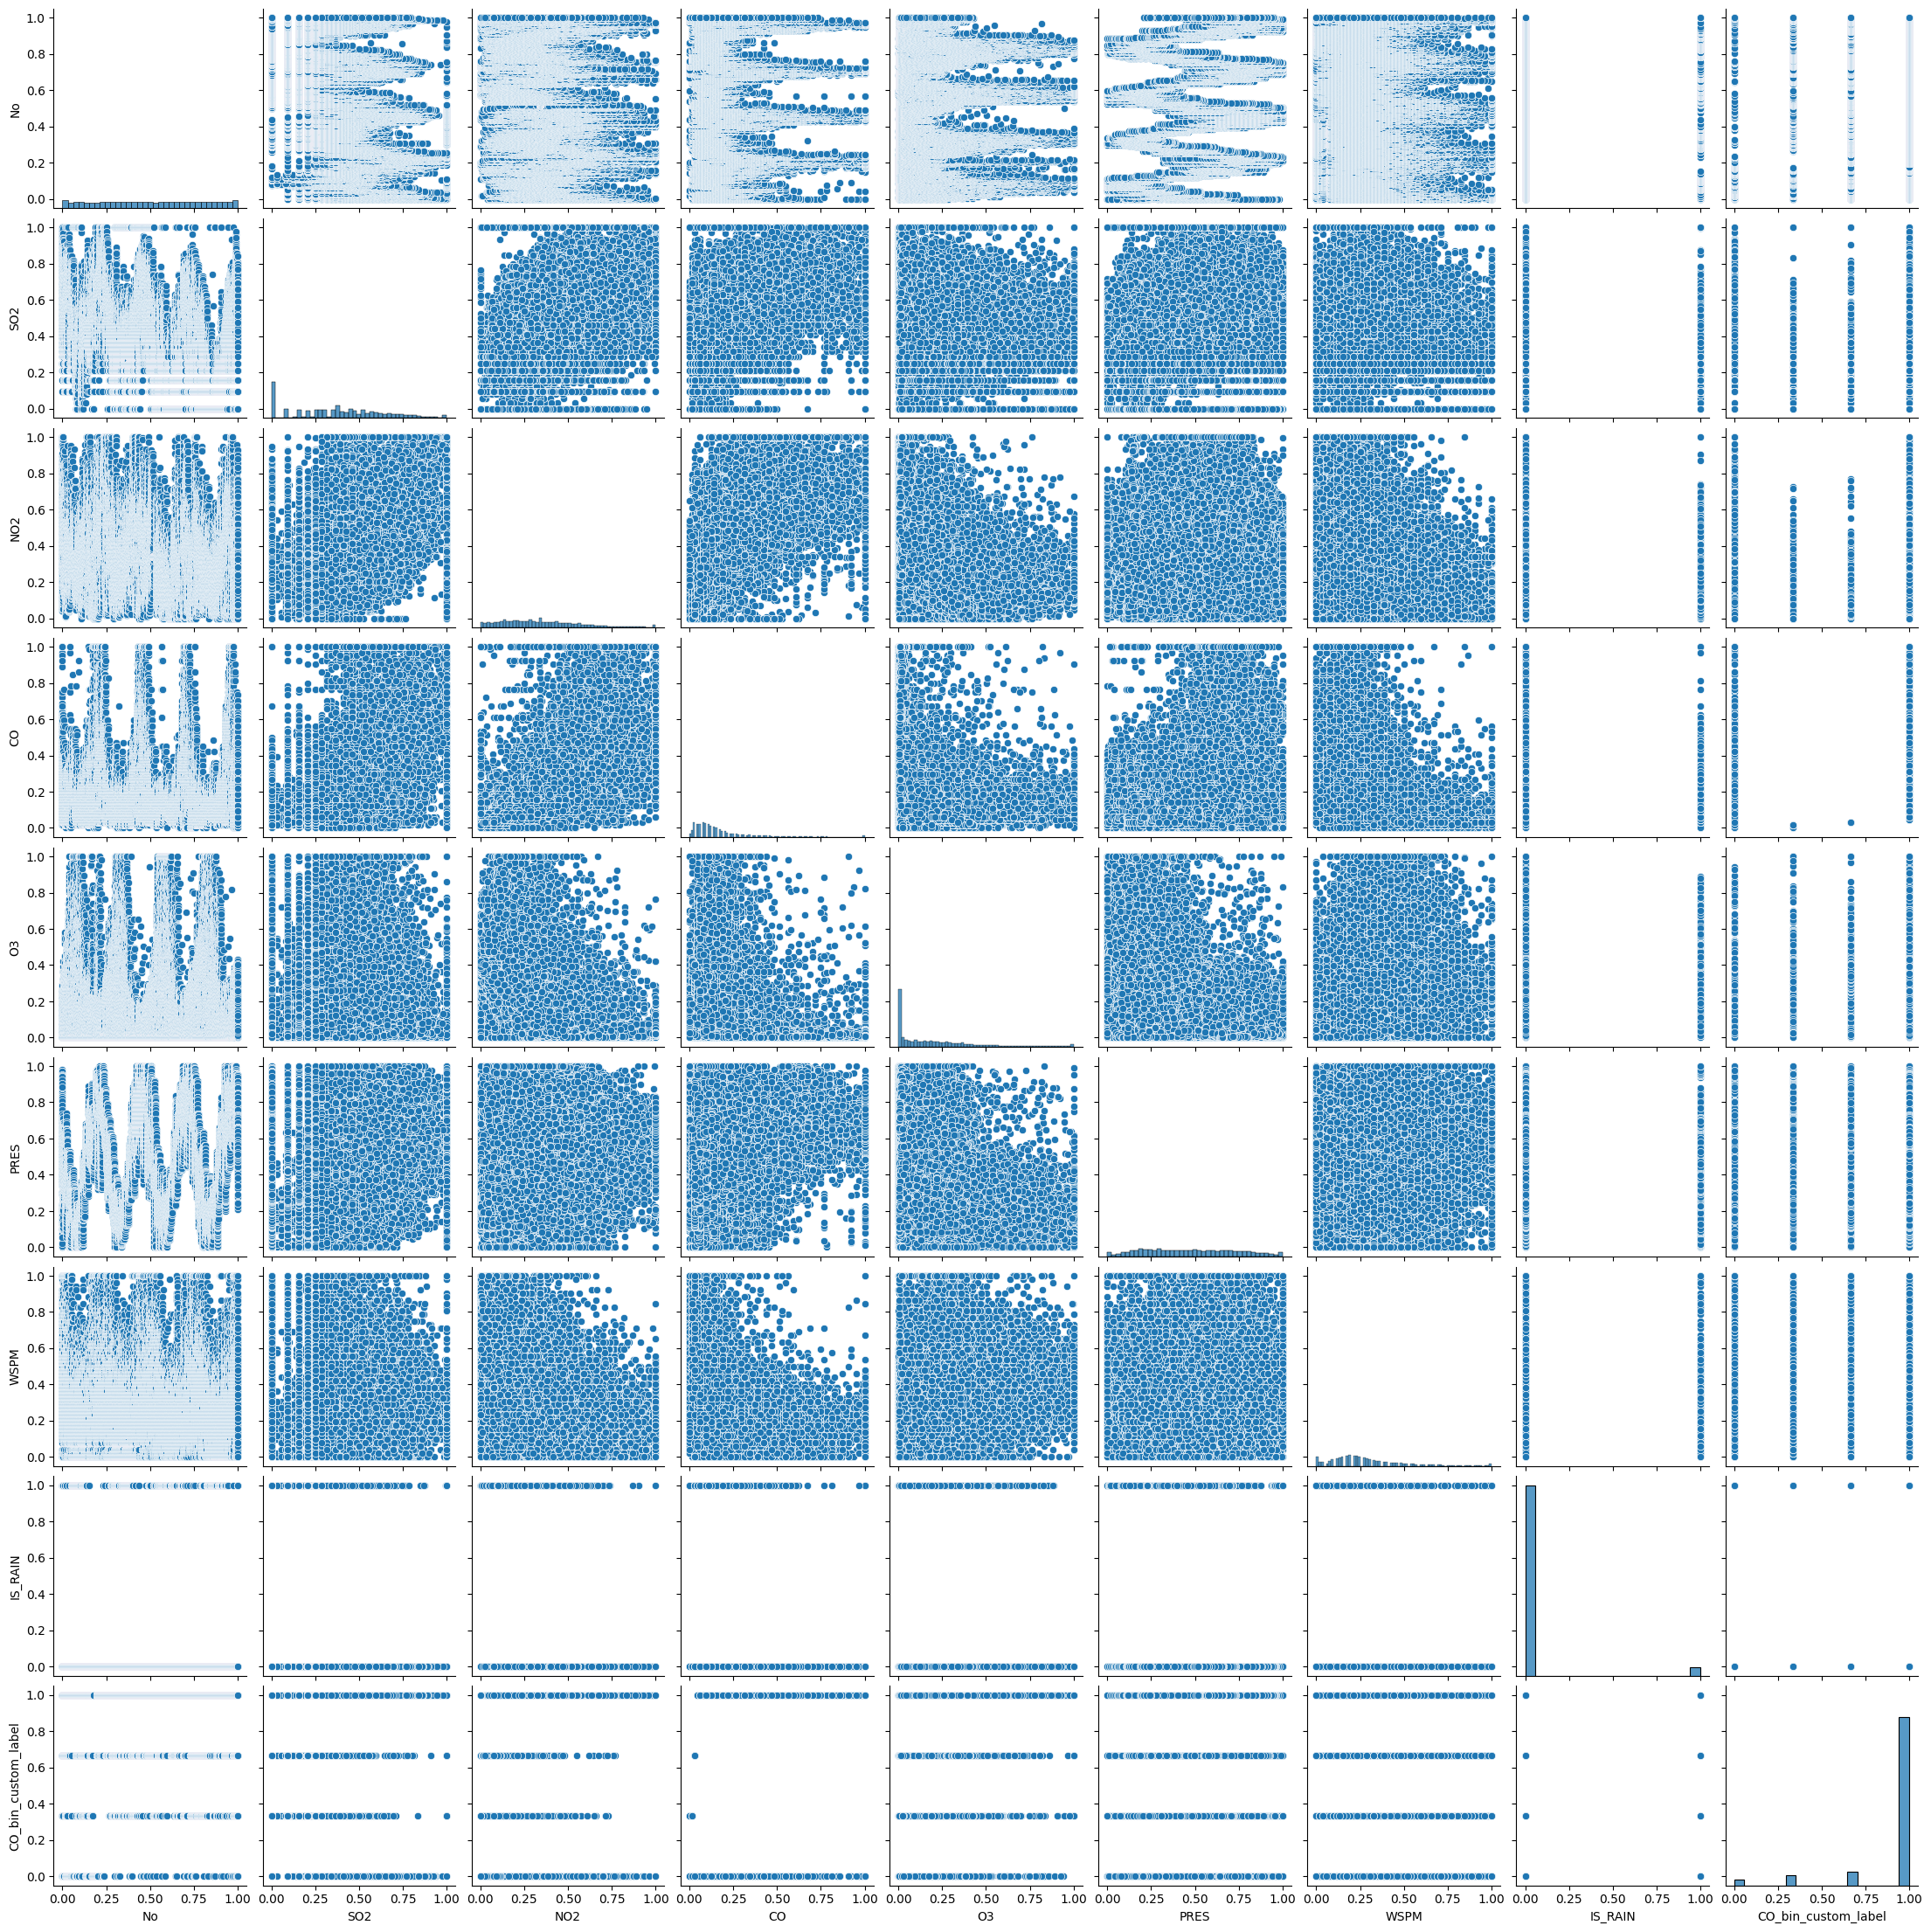

In [49]:
sns.pairplot(prsa_data[numeric_columns])
plt.show()


CO и NO2 сильно коррелируют. Можно попробовать удалить один из них или создать новый комбинированный признак.

Для дальнейшего анализа можно провести отбор признаков с помощью модели классификации (например, случайного леса), чтобы определить наиболее значимые для предсказания AQI Label.